In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

In [3]:
#loading the data
path = r"C:\Users\MLC\Downloads\hypertension data\hypertension_data.csv"

#reading the data
df = pd.read_csv(path)

#displaying the first five rows of the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Preprocessing:


In [4]:
#displaying the shape of the data
df.shape

(26083, 14)

In [5]:
#describing the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,26083.0,55.661389,15.189768,11.0,44.0,56.0,67.0,98.0
sex,26058.0,0.500000,0.500010,0.0,0.0,0.5,1.0,1.0
cp,26083.0,0.958594,1.023931,0.0,0.0,1.0,2.0,3.0
trestbps,26083.0,131.592992,17.588809,94.0,120.0,130.0,140.0,200.0
chol,26083.0,246.246061,51.643522,126.0,211.0,240.0,275.0,564.0
fbs,26083.0,0.149753,0.356836,0.0,0.0,0.0,0.0,1.0
restecg,26083.0,0.526512,0.525641,0.0,0.0,1.0,1.0,2.0
thalach,26083.0,149.655024,22.858109,71.0,133.0,153.0,166.0,202.0
exang,26083.0,0.326573,0.468969,0.0,0.0,0.0,1.0,1.0
oldpeak,26083.0,1.039512,1.165138,0.0,0.0,0.8,1.6,6.2


In [6]:
#info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [27]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
#checking for missing values
df.isna().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

# As it contains 25 missing values  in sex column we can drop the null values as it already has balanced data

In [8]:
#dropping the missing values
df = df.dropna(subset=['sex']) 

#checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#scaling the data
scaler = StandardScaler()

#features and target
features = df.drop('target', axis = 1)

scaled_feature = scaler.fit_transform(features)

In [10]:
X = scaled_feature
y = df['target']

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
#checking the shape of the train and test data
X_train.shape, X_test.shape

((20846, 13), (5212, 13))

In [12]:
#checking the shape of the train and test data
y_train.shape, y_test.shape

((20846,), (5212,))

Model Building

In [ ]:
#creating the model
model = RandomForestClassifier()

#fitting the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
#predicting the model
y_pred = model.predict(X_test)

In [15]:
#making custom function to evaluate the model
def Evaluate_model(y_test, y_pred):
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))

#calling the function
Evaluate_model(y_test, y_pred)

Accuracy: 1.0
Confusion Matrix:
 [[2319    0]
 [   0 2893]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2319
           1       1.00      1.00      1.00      2893

    accuracy                           1.00      5212
   macro avg       1.00      1.00      1.00      5212
weighted avg       1.00      1.00      1.00      5212

Recall: 1.0
Precision: 1.0
F1 Score: 1.0


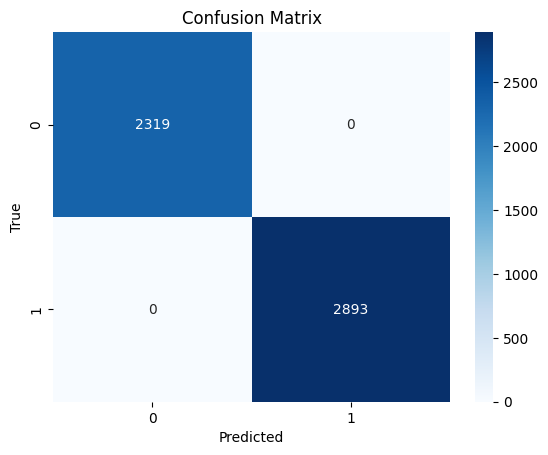

In [ ]:
#displaying the feature importance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Model Deployment

In [18]:
#deploying the model
import joblib
joblib.dump(model, 'heart_diseases_model.pkl')

['heart_diseases_model.pkl']

In [19]:
#loading the model
model = joblib.load('heart_diseases_model.pkl')

In [20]:
#creating the model
from sklearn.linear_model import LogisticRegression
Logistic_model = LogisticRegression()

#fitting the model
Logistic_model.fit(X_train, y_train)

#predicting the model
y_pred_logistic = Logistic_model.predict(X_test)


#calling the function evaluate model
Evaluate_model(y_test, y_pred_logistic), Evaluate_model(y_test, y_pred)

Accuracy: 0.8562931696085956
Confusion Matrix:
 [[1811  508]
 [ 241 2652]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      2319
           1       0.84      0.92      0.88      2893

    accuracy                           0.86      5212
   macro avg       0.86      0.85      0.85      5212
weighted avg       0.86      0.86      0.86      5212

Recall: 0.9166954718285517
Precision: 0.839240506329114
F1 Score: 0.8762597059309434
Accuracy: 1.0
Confusion Matrix:
 [[2319    0]
 [   0 2893]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2319
           1       1.00      1.00      1.00      2893

    accuracy                           1.00      5212
   macro avg       1.00      1.00      1.00      5212
weighted avg       1.00      1.00      1.00      5212

Recall: 1.0
Precision: 1.0
F1 Score: 1.0


(None, None)

In [ ]:
#creating the model
from sklearn.svm import SVC
svc_model = SVC()

#fitting the model
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

#calling the function evaluate model
Evaluate_model(y_test, y_pred_svc)

Accuracy: 0.9846508058326938
Confusion Matrix:
 [[2256   63]
 [  17 2876]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2319
           1       0.98      0.99      0.99      2893

    accuracy                           0.98      5212
   macro avg       0.99      0.98      0.98      5212
weighted avg       0.98      0.98      0.98      5212

Recall: 0.994123746975458
Precision: 0.9785641374617217
F1 Score: 0.9862825788751715


The best model is Random Forest 
as the confusion matrix is best accuracy is 1.0

In [22]:
#deploying the model
import joblib
svc_model = joblib.dump(svc_model, 'svc_model.pkl')
Logistic_model = joblib.dump(Logistic_model, 'Logistic_model.pkl')